In [1]:
import numpy as np
import pandas as pd

In [2]:
!ls

'Adaline AI lab 4.ipynb'   male_female_prediction.csv


In [3]:
df=pd.read_csv('male_female_prediction.csv')

In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


Here we want to predict male and female based on height and weight.
We don't need to Index column so we drop it
and convert male and female to numeric label
0:male
1:female

In [5]:
#df=df.drop(columns=['Gender'])
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
df['Gender'].replace(['Male', 'Female'],
                        [1, 0], inplace=True)

In [7]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [8]:
height_list=df['Height'].to_list()
weight_list=df["Weight"].to_list()


In [9]:
len(height_list),len(weight_list),len(df)

(500, 500, 500)

In [10]:
X=np.array(list(zip(height_list,weight_list)),dtype=np.float32)
X.shape

(500, 2)

In [11]:
X.dtype

dtype('float32')

So we have a feature vector having 500 inputs with 2 feature for each inputs

In [12]:
X=X/1000
X

array([[0.174, 0.096],
       [0.189, 0.087],
       [0.185, 0.11 ],
       [0.195, 0.104],
       [0.149, 0.061],
       [0.189, 0.104],
       [0.147, 0.092],
       [0.154, 0.111],
       [0.174, 0.09 ],
       [0.169, 0.103],
       [0.195, 0.081],
       [0.159, 0.08 ],
       [0.192, 0.101],
       [0.155, 0.051],
       [0.191, 0.079],
       [0.153, 0.107],
       [0.157, 0.11 ],
       [0.14 , 0.129],
       [0.144, 0.145],
       [0.172, 0.139],
       [0.157, 0.11 ],
       [0.153, 0.149],
       [0.169, 0.097],
       [0.185, 0.139],
       [0.172, 0.067],
       [0.151, 0.064],
       [0.19 , 0.095],
       [0.187, 0.062],
       [0.163, 0.159],
       [0.179, 0.152],
       [0.153, 0.121],
       [0.178, 0.052],
       [0.195, 0.065],
       [0.16 , 0.131],
       [0.157, 0.153],
       [0.189, 0.132],
       [0.197, 0.114],
       [0.144, 0.08 ],
       [0.171, 0.152],
       [0.185, 0.081],
       [0.175, 0.12 ],
       [0.149, 0.108],
       [0.157, 0.056],
       [0.1

Now our outputs Y is array of labels 1 and 0 

In [13]:
Y=np.array(df['Gender'].to_list())

In [14]:
Y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [15]:
Y.shape,Y.dtype

((500,), dtype('int64'))

Now let's begin the actual adaline coding portion

In [16]:
from numpy.random.mtrand import randint

def random_weights(X,random_state:int):
  rand = np.random.RandomState(random_state)
  w=rand.normal(loc=0.0,scale=1.0,size=1+X.shape[1])

  '''create vector of random weights
    Parameters
    ----------
    X: 2-dimensional array, shape = [n_samples, n_features]
    Returns
    -------
    w: array, shape = [w_bias + n_features]'''

  return w

In [17]:
w=random_weights(X,7)
print("initial random weights",w[1:],"bias:",w[0])

initial random weights [-0.46593737  0.03282016] bias: 1.690525703800356


In [18]:
def linear_aggregation_function(X,w):
    return np.dot(X,w[1:])+w[0]

In [19]:
#let's create a random activation function which says that it is male if y> 1 else female 
#we randomly decided this activation function insteed of calculating probobalities for both male and female

def predict(X, w):
    '''Return class label after unit step'''
    return np.where(linear_aggregation_function(X, w) >= 0.5, 1, 0)


In [20]:
#let's calculate outputs for only one input 
x=X[0]
out=linear_aggregation_function(x,w)
print(out)

1.612603339399633


In [21]:
print(predict(x,w))

1


Remember that although ADALINE learning rule works by comparing the output of a linear function against the class labels when doing predictions, we still need to pass the output by a threshold function to get class labels as in the perceptron.

In [22]:
def fit(X, y, eta=0.001, n_iter=1):
    '''loop over exemplars and update weights'''
    mse_iteration = []
    w = random_weights(X, random_state=1)
    for pair in range(n_iter):
        output = linear_aggregation_function(X, w)
        #since our loss function is mean square error derivative of (y-y_predicted)^2 is d(y-y_predicted)
        gradient = 2*(y - output)
        w[1:] += eta*(X.T @ gradient)
        w[0] += eta*gradient.sum()
        mse = (((y - output)**2).sum())/len(y)
        mse_iteration.append(mse)
    return w, mse_iteration


In [28]:
w, mse = fit(X, Y, eta=1e-4, n_iter=24)
y_pred = predict(X, w)
num_correct_predictions = (y_pred == Y).sum()
accuracy = (num_correct_predictions / Y.shape[0]) * 100
print('ADALINE accuracy: %.2f%%' % accuracy)


ADALINE accuracy: 49.00%


In [29]:
print(mse)

[1.1997233350358036, 1.0125169977796196, 0.8622292822526431, 0.741579529057947, 0.6447228854135264, 0.5669671521405906, 0.5045454707818605, 0.4544338387115925, 0.41420461178434936, 0.38190889748042683, 0.35598214110160126, 0.3351683311546858, 0.3184591520641315, 0.30504513647600834, 0.29427645073410064, 0.28563141378641704, 0.2786912244252884, 0.2731196725260121, 0.2686468513980562, 0.2650560821961351, 0.2621734169462214, 0.25985921166217374, 0.25800136131388435, 0.25650986891599953]


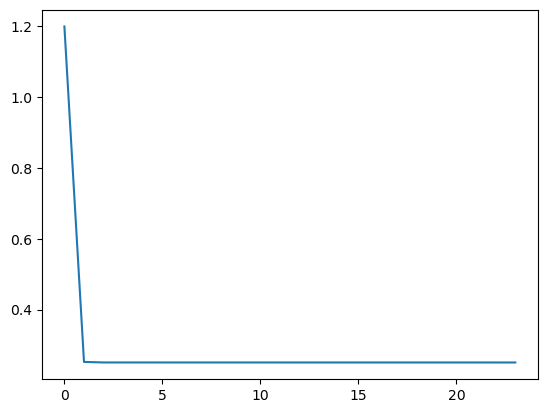

In [25]:
import matplotlib.pyplot as plt
plt.plot(mse)

Since our dataset is small and we are using male and female categorical values as linear values our adaline function 
is unable to map it properly using only 2 features .From the graph we can predict that two feature values makes our model unable
to properly classify our model